In [1]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
import matplotlib.pyplot as plt
from scipy import stats
from imblearn.over_sampling import SMOTE
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

# Lettura dataset e test set
data = pd.read_csv("train.csv", sep = ",")
test = pd.read_csv("test_set.csv", sep = ",")
data.head()

,F0,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,Y
0,39,K1,77516,R1,13,Q1,P1,M1,caucasian,Male,2174,0,40,USA,0
1,50,K2,83311,R1,13,Q2,P2,M2,caucasian,Male,0,0,13,USA,0
2,38,K3,215646,R2,9,Q3,P3,M1,caucasian,Male,0,0,40,USA,0
3,53,K3,234721,R3,7,Q2,P3,M2,black,Male,0,0,40,USA,0
4,28,K3,338409,R1,13,Q2,P4,M3,black,Female,0,0,40,Cuba,0


In [2]:
data.nunique()
counts = data["F13"].value_counts()
print(counts)

USA                   25564
Mexico                  565
Philippines             167
Germany                 118
Canada                  109
Puerto-Rico             108
El-Salvador              89
India                    85
England                  85
Cuba                     83
South                    74
Jamaica                  70
China                    67
Italy                    60
Vietnam                  58
Dominican-Republic       58
Guatemala                56
Japan                    55
Poland                   54
Columbia                 51
Taiwan                   48
Iran                     40
Haiti                    38
Portugal                 33
Nicaragua                31
Greece                   26
Peru                     26
France                   25
Ecuador                  22
Ireland                  22
Thailand                 18
Cambodia                 17
Laos                     15
Hong                     14
Yugoslavia               13
Caribbean           

In [3]:
asia = ["Philippines", "India", "South", "China", "Vietnam", "Japan", "Taiwan", "Iran", "Thailand", "Cambodia", "Laos", "Hong"]
europe = ["Germany", "England", "Italy", "Poland", "Portugal", "Greece", "France", "Ireland", "Yugoslavia", "Hungary", "Scotland", "Netherlands"]
north_america = ["USA", "Canada"]
central_america = ["Mexico", "Puerto-Rico", "El-Salvador", "Cuba", "Jamaica", "Dominican-Republic", "Guatemala", "Haiti", "Nicaragua", "Caribbean", "Honduras"]
south_america = ["Columbia", "Peru", "Ecuador"]

In [4]:
for i in range(len(data)):
    if data.loc[i, "F13"] in asia:
        data.F13.replace(data.loc[i, "F13"], "asia", inplace = True)
    elif data.loc[i, "F13"] in europe:
        data.F13.replace(data.loc[i, "F13"], "europe", inplace = True)
    elif data.loc[i, "F13"] in north_america:
        data.F13.replace(data.loc[i, "F13"], "north_america", inplace = True)
    elif data.loc[i, "F13"] in central_america:
        data.F13.replace(data.loc[i, "F13"], "central_america", inplace = True)
    elif data.loc[i, "F13"] in south_america:
        data.F13.replace(data.loc[i, "F13"], "south_america", inplace = True)

for i in range(len(test)):
    if test.loc[i, "F13"] in asia:
        test.F13.replace(test.loc[i, "F13"], "asia", inplace = True)
    if test.loc[i, "F13"] in europe:
        test.F13.replace(test.loc[i, "F13"], "europe", inplace = True)
    if test.loc[i, "F13"] in north_america:
        test.F13.replace(test.loc[i, "F13"], "north_america", inplace = True)
    if test.loc[i, "F13"] in central_america:
        test.F13.replace(test.loc[i, "F13"], "central_america", inplace = True)
    if test.loc[i, "F13"] in south_america:
        test.F13.replace(test.loc[i, "F13"], "south_america", inplace = True)

In [5]:
data.head(20)

,F0,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,Y
0,39,K1,77516,R1,13,Q1,P1,M1,caucasian,Male,2174,0,40,north_america,0
1,50,K2,83311,R1,13,Q2,P2,M2,caucasian,Male,0,0,13,north_america,0
2,38,K3,215646,R2,9,Q3,P3,M1,caucasian,Male,0,0,40,north_america,0
3,53,K3,234721,R3,7,Q2,P3,M2,black,Male,0,0,40,north_america,0
4,28,K3,338409,R1,13,Q2,P4,M3,black,Female,0,0,40,central_america,0
5,37,K3,284582,R4,14,Q2,P2,M3,caucasian,Female,0,0,40,north_america,0
6,49,K3,160187,R5,5,Q4,P5,M1,black,Female,0,0,16,central_america,0
7,52,K2,209642,R2,9,Q2,P2,M2,caucasian,Male,0,0,45,north_america,1
8,31,K3,45781,R4,14,Q1,P4,M1,caucasian,Female,14084,0,50,north_america,1
9,42,K3,159449,R1,13,Q2,P2,M2,caucasian,Male,5178,0,40,north_america,1


In [5]:
# Colonne feature categoriche
colF1 = ['K1', 'K2', 'K3', 'K4', 'K5', 'K6', 'K7', 'K8']
colF3 = ['R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11', 'R12', 'R13', 'R14', 'R15', 'R16']
colF5 = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7']
colF6 = ['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14']
colF7 = ['M1', 'M2', 'M3', 'M4', 'M5', 'M6']
colF8 = ['caucasian', 'black', 'asian', 'american', 'other']
colF9 = ['Male', 'Female']
colF13 = ['asia', 'europe', 'north_america', 'central_america', 'south_america']

# Codifica delle feature categoriche
data.F1.replace(colF1, [0, 1, 2, 3, 4, 5, 6, 7], inplace = True)
data.F3.replace(colF3, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], inplace = True)
data.F5.replace(colF5, [0, 1, 2, 3, 4, 5, 6], inplace = True)
data.F6.replace(colF6, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], inplace = True)
data.F7.replace(colF7, [0, 1, 2, 3, 4, 5], inplace = True)
data.F8.replace(colF8, [0, 1, 2, 3, 4], inplace = True)
data.F9.replace(colF9, [0, 1], inplace = True)
data.F13.replace(colF13, [0, 1, 2, 3, 4], inplace = True)

test.F1.replace(colF1, [0, 1, 2, 3, 4, 5, 6, 7], inplace = True)
test.F3.replace(colF3, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], inplace = True)
test.F5.replace(colF5, [0, 1, 2, 3, 4, 5, 6], inplace = True)
test.F6.replace(colF6, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], inplace = True)
test.F7.replace(colF7, [0, 1, 2, 3, 4, 5], inplace = True)
test.F8.replace(colF8, [0, 1, 2, 3, 4], inplace = True)
test.F9.replace(colF9, [0, 1], inplace = True)
test.F13.replace(colF13, [0, 1, 2, 3, 4], inplace = True)

In [7]:
data.head()

,F0,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,Y
0,39,0.0,77516,0,13,0,0.0,0,0,0,2174,0,40,2.0,0
1,50,1.0,83311,0,13,1,1.0,1,0,0,0,0,13,2.0,0
2,38,2.0,215646,1,9,2,2.0,0,0,0,0,0,40,2.0,0
3,53,2.0,234721,2,7,1,2.0,1,1,0,0,0,40,2.0,0
4,28,2.0,338409,0,13,1,3.0,2,1,1,0,0,40,3.0,0


In [8]:
test.head()

,F0,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,Y
0,39,2.0,30269,7,11,2,5.0,4,0,1,0,0,40,2.0,0
1,42,2.0,204235,5,10,1,3.0,1,0,0,0,0,40,2.0,1
2,46,4.0,209057,3,14,1,1.0,1,0,0,0,0,50,2.0,1
3,73,2.0,349347,8,4,1,2.0,1,0,0,0,0,25,2.0,0
4,47,4.0,154033,5,10,2,3.0,0,0,1,0,1876,40,2.0,0


In [13]:
# Suddivisione del target dal resto delle feature
x_train = data.iloc[:, :-1].values
y_train = data.iloc[:, -1].values
print(x_train.shape)
print(y_train.shape)

x_test = test.iloc[:, :-1].values
y_test = test.iloc[:, -1].values
print(x_test.shape)
print(y_test.shape)

(28521, 14)
(28521,)
(4040, 14)
(4040,)


In [10]:
np.argwhere(np.isnan(x_train))

array([[   14,    13],
       [   27,     1],
       [   27,     6],
       ...,
       [28503,     1],
       [28503,     6],
       [28505,    13]], dtype=int64)

In [16]:
np.argwhere(np.isnan(x_test))

array([[  22,    1],
       [  22,    6],
       [  27,    1],
       ...,
       [4020,    6],
       [4021,    1],
       [4021,    6]], dtype=int64)

In [14]:
# Imputazione dei valori NaN tramite SimpleImputer, con la strategia che sostituisce i valori mancanti con la moda dei valori della feature
print("SimpleImputer")
imp = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
x_train_notnan = imp.fit_transform(x_train)
x_test_notnan = imp.transform(x_test)
print(x_train_notnan[pd.isna(x_train[:,0]),0][0:10])
print(x_test_notnan[pd.isna(x_test[:,0]),0][0:10])

SimpleImputer
[]
[]


In [15]:
# Creazione DataFrame da insiemi di train e test dopo l'imputazione dei valori mancanti 
colF = ['F0','F1','F2','F3','F4','F5','F6','F7','F8','F9','F10','F11','F12','F13']

training_set_df = pd.DataFrame(x_train_notnan, columns = colF)
test_set_df = pd.DataFrame(x_test_notnan, columns = colF)

In [16]:
# Codifica OneHot contemporaneamente su training_set_df e test_set_df
OneHotF1 = pd.get_dummies(training_set_df.F1)
OneHotTestF1 = pd.get_dummies(test_set_df.F1)
OneHotF3 = pd.get_dummies(training_set_df.F3)
OneHotTestF3 = pd.get_dummies(test_set_df.F3)
OneHotF5 = pd.get_dummies(training_set_df.F5)
OneHotTestF5 = pd.get_dummies(test_set_df.F5)
OneHotF6 = pd.get_dummies(training_set_df.F6)
OneHotTestF6 = pd.get_dummies(test_set_df.F6)
OneHotF7 = pd.get_dummies(training_set_df.F7)
OneHotTestF7 = pd.get_dummies(test_set_df.F7)
OneHotF8 = pd.get_dummies(training_set_df.F8)
OneHotTestF8 = pd.get_dummies(test_set_df.F8)
OneHotF9 = pd.get_dummies(training_set_df.F9)
OneHotTestF9 = pd.get_dummies(test_set_df.F9)
OneHotF13 = pd.get_dummies(training_set_df.F13)
OneHotTestF13 = pd.get_dummies(test_set_df.F13)

for i in range (0, len(colF1)):
    OneHotF1 = OneHotF1.rename(columns = {i: colF1[i]})
    OneHotTestF1 = OneHotTestF1.rename(columns = {i: colF1[i]})
for i in range (0, len(colF3)):
    OneHotF3 = OneHotF3.rename(columns = {i: colF3[i]})
    OneHotTestF3 = OneHotTestF3.rename(columns = {i: colF3[i]})
for i in range (0, len(colF5)):
    OneHotF5 = OneHotF5.rename(columns = {i: colF5[i]})
    OneHotTestF5 = OneHotTestF5.rename(columns = {i: colF5[i]})
for i in range (0, len(colF6)):
    OneHotF6 = OneHotF6.rename(columns = {i: colF6[i]})
    OneHotTestF6 = OneHotTestF6.rename(columns = {i: colF6[i]})
for i in range (0, len(colF7)):
    OneHotF7 = OneHotF7.rename(columns = {i: colF7[i]})
    OneHotTestF7 = OneHotTestF7.rename(columns = {i: colF7[i]})
for i in range (0, len(colF8)):
    OneHotF8 = OneHotF8.rename(columns = {i: colF8[i]})
    OneHotTestF8 = OneHotTestF8.rename(columns = {i: colF8[i]})
for i in range (0, len(colF9)):
    OneHotF9 = OneHotF9.rename(columns = {i: colF9[i]})
    OneHotTestF9 = OneHotTestF9.rename(columns = {i: colF9[i]})
for i in range (0, len(colF13)):
    OneHotF13 = OneHotF13.rename(columns = {i: colF13[i]})
    OneHotTestF13 = OneHotTestF13.rename(columns = {i: colF13[i]})

In [17]:
# Creazione newdf e newdftest con la sostituzione delle colonne generate con la codifica
training_set_df = pd.concat([training_set_df, OneHotF1, OneHotF3, OneHotF5, OneHotF6, OneHotF7, OneHotF8, OneHotF9, OneHotF13], axis = 1)
test_set_df = pd.concat([test_set_df, OneHotTestF1, OneHotTestF3, OneHotTestF5, OneHotTestF6, OneHotTestF7, OneHotTestF8, OneHotTestF9, OneHotTestF13], axis = 1)

training_set_df = training_set_df.drop(["F1", "F3", "F5", "F6", "F7", "F8", "F9", "F13"], axis = 1)
test_set_df = test_set_df.drop(["F1", "F3", "F5", "F6", "F7", "F8", "F9", "F13"], axis = 1)

In [15]:
training_set_df.head()

,F0,F2,F4,F10,F11,F12,K1,K2,K3,K4,...,asian,american,other,Male,Female,asia,europe,north_america,central_america,south_america
0,39.0,77516.0,13.0,2174.0,0.0,40.0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,50.0,83311.0,13.0,0.0,0.0,13.0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
2,38.0,215646.0,9.0,0.0,0.0,40.0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
3,53.0,234721.0,7.0,0.0,0.0,40.0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
4,28.0,338409.0,13.0,0.0,0.0,40.0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [16]:
test_set_df.head()

,F0,F2,F4,F10,F11,F12,K1,K2,K3,K4,...,asian,american,other,Male,Female,asia,europe,north_america,central_america,south_america
0,39.0,30269.0,11.0,0.0,0.0,40.0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
1,42.0,204235.0,10.0,0.0,0.0,40.0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
2,46.0,209057.0,14.0,0.0,0.0,50.0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,73.0,349347.0,4.0,0.0,0.0,25.0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
4,47.0,154033.0,10.0,0.0,1876.0,40.0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


(array([  639.,  1919.,  2023., 15609.,  2724.,  3356.,  1561.,   393.,
          178.,   119.]),
 array([ 1. , 10.8, 20.6, 30.4, 40.2, 50. , 59.8, 69.6, 79.4, 89.2, 99. ]),
 <BarContainer object of 10 artists>)

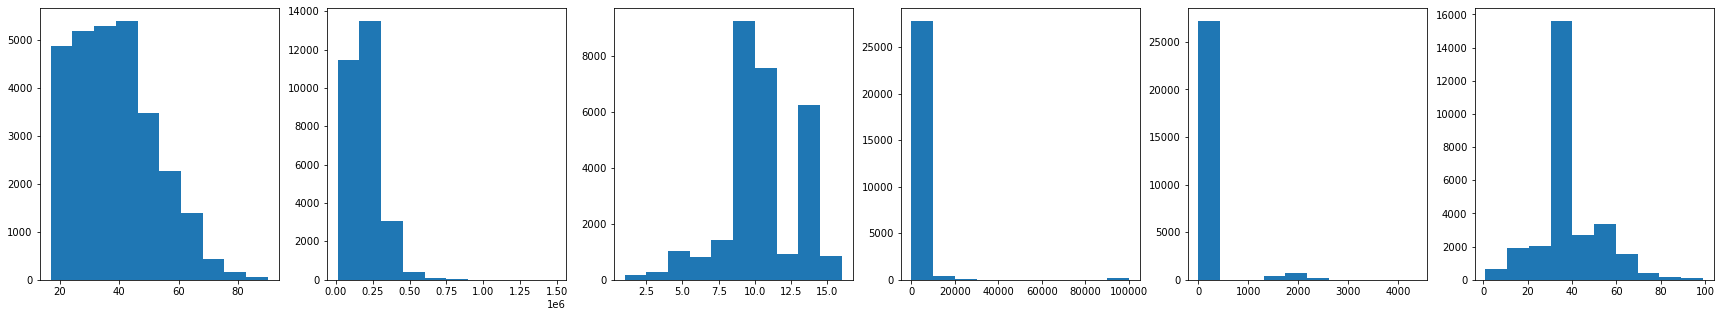

In [17]:
fig, axs = plt.subplots(1, 6, figsize = (30,5))
axs[0].hist(training_set_df.F0)
axs[1].hist(training_set_df.F2)
axs[2].hist(training_set_df.F4)
axs[3].hist(training_set_df.F10)
axs[4].hist(training_set_df.F11)
axs[5].hist(training_set_df.F12)

# L'unico outlier dovuto a un errore nel dataset è quello in F2

In [18]:
# Individuazione e rimozione degli outlier (in F2) nel training set
z_scores = stats.zscore(training_set_df["F2"])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 4)
training_set_df = training_set_df[filtered_entries]

training_set_df.head()

,F0,F2,F4,F10,F11,F12,K1,K2,K3,K4,...,asian,american,other,Male,Female,asia,europe,north_america,central_america,south_america
0,39.0,77516.0,13.0,2174.0,0.0,40.0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,50.0,83311.0,13.0,0.0,0.0,13.0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
2,38.0,215646.0,9.0,0.0,0.0,40.0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
3,53.0,234721.0,7.0,0.0,0.0,40.0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
4,28.0,338409.0,13.0,0.0,0.0,40.0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0


<AxesSubplot:ylabel='Frequency'>

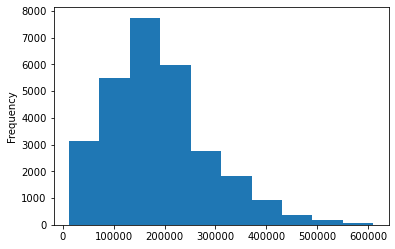

In [19]:
training_set_df["F2"].plot.hist()

In [20]:
y_training_df = pd.DataFrame(y_train, columns = ["Y"])
y_test_df = pd.DataFrame(y_test, columns = ["Y"])

In [21]:
smote = SMOTE(random_state = 0, sampling_strategy = 'not majority', k_neighbors = 10, n_jobs = -1)
x_train_notnan, y_train = smote.fit_resample(x_train_notnan, y_train)
print(x_train_notnan.shape, y_train.shape)
print(x_train_notnan)

(43386, 14) (43386,)
[[3.90000000e+01 0.00000000e+00 7.75160000e+04 ... 0.00000000e+00
  4.00000000e+01 2.00000000e+00]
 [5.00000000e+01 1.00000000e+00 8.33110000e+04 ... 0.00000000e+00
  1.30000000e+01 2.00000000e+00]
 [3.80000000e+01 2.00000000e+00 2.15646000e+05 ... 0.00000000e+00
  4.00000000e+01 2.00000000e+00]
 ...
 [3.19677741e+01 2.00000000e+00 2.82538856e+05 ... 0.00000000e+00
  4.22043190e+01 2.00000000e+00]
 [4.50596346e+01 1.18807308e+00 2.86673103e+05 ... 1.93244726e+03
  4.81192692e+01 2.00000000e+00]
 [2.90257322e+01 1.76824107e+00 1.07105326e+05 ... 0.00000000e+00
  3.76824107e+01 4.63517859e-01]]


array([[<AxesSubplot:title={'center':'Y'}>]], dtype=object)

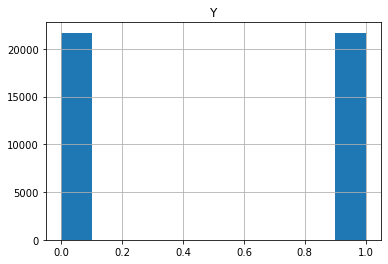

In [22]:
y_training_df = pd.DataFrame(y_train, columns = ["Y"])

y_training_df.hist()

In [23]:
# Scaling con StandardScaler

print("StandardScaler")
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_notnan)
x_test_scaled = scaler.transform(x_test_notnan)

print("Media distribuzione di partenza: {}".format(np.mean(x_train_notnan, axis=0)))
print("Media distribuzione scalata: {}".format(np.mean(x_train_scaled, axis=0)))

print("Deviazione standard distribuzione di partenza: {}".format(np.std(x_train_notnan, axis=0)))
print("Deviazione standard distribuzione scalata: {}".format(np.std(x_train_scaled, axis=0)))

print("Media distribuzione di partenza: {}".format(np.mean(x_test_notnan, axis=0)))
print("Media distribuzione scalata: {}".format(np.mean(x_test_scaled, axis=0)))

print("Deviazione standard distribuzione di partenza: {}".format(np.std(x_test_notnan, axis=0)))
print("Deviazione standard distribuzione scalata: {}".format(np.std(x_test_scaled, axis=0)))

StandardScaler
Media distribuzione di partenza: [4.05076965e+01 2.15761989e+00 1.89184548e+05 3.29998374e+00
 1.05953758e+01 1.08668506e+00 4.07386900e+00 1.38847368e+00
 1.96109037e-01 2.67205733e-01 2.17232303e+03 1.15493617e+02
 4.20971425e+01 1.96825953e+00]
Media distribuzione scalata: [ 2.97811070e-15  6.08035828e-15 -2.44150290e-15  2.75996080e-15
 -5.09450501e-14 -1.21978929e-15  5.13349562e-16 -8.85969028e-15
  9.51289120e-15 -3.05880108e-14 -2.84389721e-14  3.63833617e-14
  2.40204886e-14  1.53964437e-14]
Deviazione standard distribuzione di partenza: [1.24308517e+01 9.21685276e-01 1.03669537e+05 3.20661173e+00
 2.48179147e+00 1.07254870e+00 2.77721290e+00 1.23211559e+00
 5.66729827e-01 4.26628642e-01 1.10650611e+04 4.56750694e+02
 1.14791980e+01 3.73202707e-01]
Deviazione standard distribuzione scalata: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Media distribuzione di partenza: [3.84698020e+01 2.10915842e+00 1.89688855e+05 3.53564356e+00
 1.00910891e+01 1.04480198e+00 4.222

Best: 0.911538 using {'learning_rate': 1, 'n_estimators': 1000}
0.8663366336633663


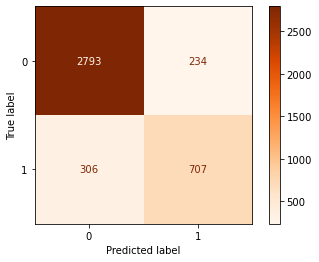

In [24]:
from sklearn.ensemble import AdaBoostClassifier

classifierADA = AdaBoostClassifier()

grid = dict()
# grid['n_estimators'] = [40, 200, 1000]
# grid['learning_rate'] = [.001, .01, .1, 1]
grid['n_estimators'] = [1000]
grid['learning_rate'] = [1]

# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)

# define the grid search procedure
grid_search = GridSearchCV(estimator = classifierADA, param_grid = grid, n_jobs = -1, cv = cv, scoring = 'accuracy')

# execute the grid search
grid_fit = grid_search.fit(x_train_scaled, y_train)

# execute the grid search
y_pred_rf = grid_search.predict(x_test_scaled)

# summarize the best score and configuration
print("Best: %f using %s" % (grid_fit.best_score_ , grid_fit.best_params_))

CM_ADA = confusion_matrix(y_test, y_pred_rf)
PercADA = (CM_ADA[0,0]+CM_ADA[1,1])/CM_ADA.sum()

cmd = ConfusionMatrixDisplay(CM_ADA)
cmd.plot(cmap = "Oranges")

print(PercADA)

Best: 0.902388 using {'criterion': 'entropy', 'n_estimators': 200}
0.8435643564356435


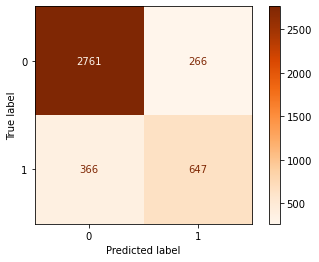

In [25]:
from sklearn.ensemble import RandomForestClassifier

classifierRF = RandomForestClassifier()

grid = dict()
# grid['n_estimators'] = [40, 200, 1000]
# grid['learning_rate'] = [.001, .01, .1, 1]
grid['n_estimators'] = [200]
grid['criterion'] = ['entropy']

# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 5, random_state = 1)

# define the grid search procedure
grid_search = GridSearchCV(estimator = classifierRF, param_grid = grid, n_jobs = -1, cv = cv, scoring = 'accuracy')

# execute the grid search
grid_fit = grid_search.fit(x_train_scaled, y_train)

# execute the grid search
y_pred_rf = grid_search.predict(x_test_scaled)

# summarize the best score and configuration
print("Best: %f using %s" % (grid_fit.best_score_ , grid_fit.best_params_))

CM_RF = confusion_matrix(y_test, y_pred_rf)
PercRF = (CM_RF[0,0]+CM_RF[1,1])/CM_RF.sum()

cmd = ConfusionMatrixDisplay(CM_RF)
cmd.plot(cmap = "Oranges")

print(PercRF)

Best: 0.862782 using {'gamma': 'auto', 'kernel': 'rbf'}
0.8247524752475247


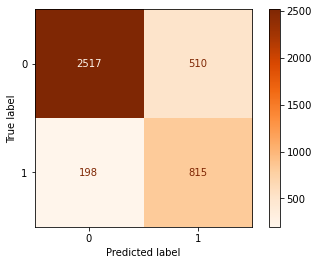

In [26]:
from sklearn.svm import SVC

classifierSVM = SVC()

grid = dict()
# grid['kernel'] = ['rbf', 'linear']
# grid['gamma'] = ['scale', 'auto']
grid['kernel'] = ['rbf']
grid['gamma'] = ['auto']

# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)

# define the grid search procedure
grid_search = GridSearchCV(estimator = classifierSVM, param_grid = grid, n_jobs = -1, cv = cv, scoring = 'accuracy')

# execute the grid search
grid_fit = grid_search.fit(x_train_scaled, y_train)

# execute the grid search
y_pred_rf = grid_search.predict(x_test_scaled)

# summarize the best score and configuration
print("Best: %f using %s" % (grid_fit.best_score_ , grid_fit.best_params_))

CM_SVM = confusion_matrix(y_test, y_pred_rf)
PercSVM = (CM_SVM[0,0]+CM_SVM[1,1])/CM_SVM.sum()

cmd = ConfusionMatrixDisplay(CM_SVM)
cmd.plot(cmap = "Oranges")

print(PercSVM)